<a href="https://colab.research.google.com/github/LhGhan/LhGhan/blob/main/Goldpricepredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectives

The main goal of this notebook is to build a machine learning system that can predict GLD (gold) prices based on several other stock prices.
Obtain data insights using pandas.
Find the correlation of the other features with GLD (gold) stock price.
Predict the GLD (gold) price by splitting the data and evaluate the model.




In the context of gold price prediction, the features SPX, GLD, USO, SLV, and EUR/USD are commonly used in various predictive models. These features represent different aspects that can influence or correlate with the price of gold:

SPX (Standard and Poor's 500):

A widely followed stock market index representing the performance of 500 large companies in the U.S. stock market.

GLD (Gold):

The actual gold prices, serving as the target variable for prediction.

USO:

Likely referring to the United States Oil Fund, representing the price movement of West Texas Intermediate (WTI) light, sweet crude oil.

SLV:

Representing silver prices. The correlation between gold (GLD) and silver (SLV) is often explored in predicting gold prices.

EUR/USD:

The exchange rate between the Euro and U.S. Dollar. Changes in currency values can impact gold prices.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('gld_price_data.csv')
df.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.shape

(2290, 6)

In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#check missing value
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#check duplication data
df[df.duplicated()]

,Date,SPX,GLD,USO,SLV,EUR/USD


In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<ipython-input-9-224e457afda7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')


<Axes: >

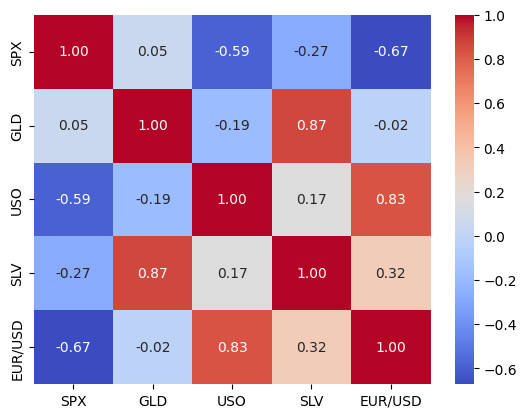

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')

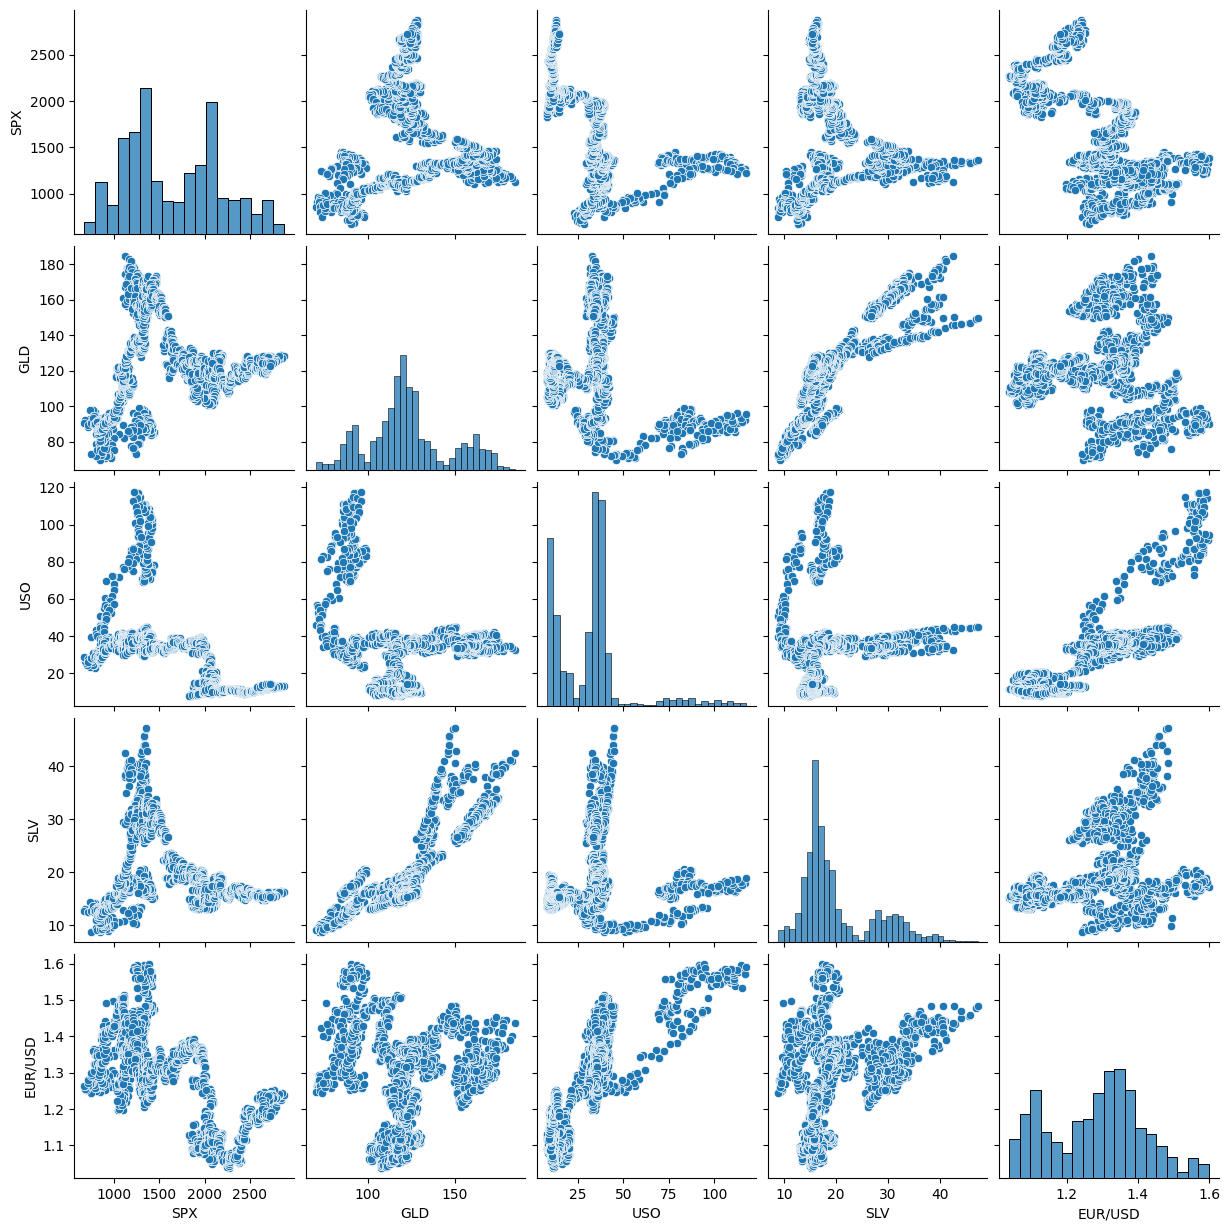

In [ ]:
sns.pairplot(df)

Text(0.5, 1.0, 'Gold versus Silver price')

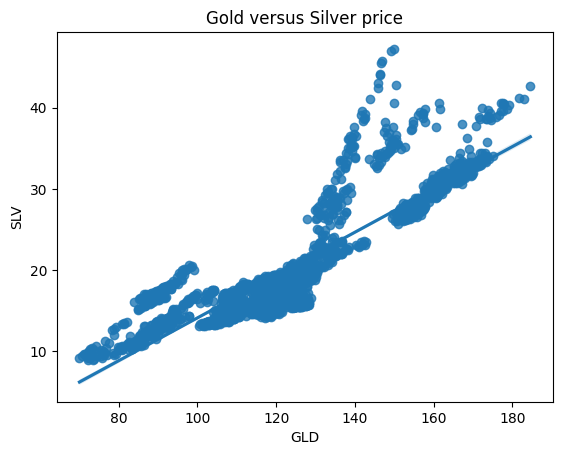

In [ ]:
sns.regplot(y='SLV',x='GLD',data=df)
plt.title('Gold versus Silver price')


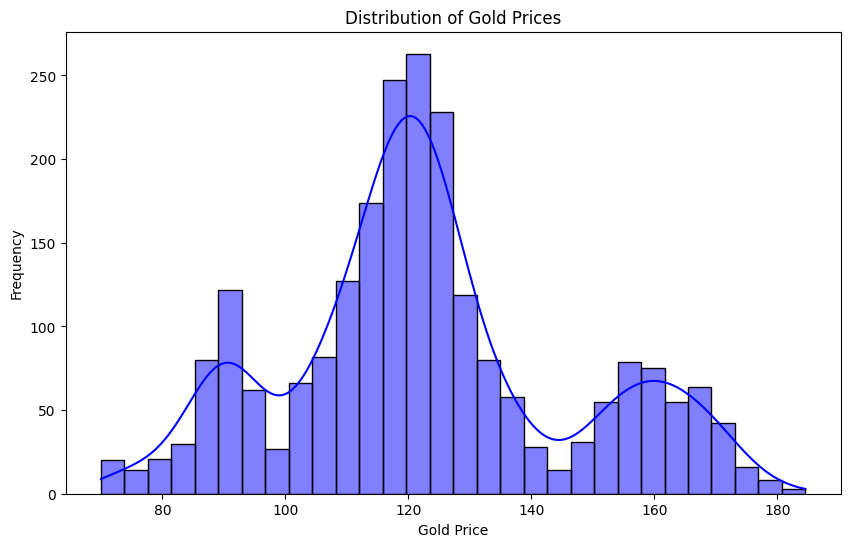

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['GLD'], bins=30, kde=True, color='blue')
plt.title('Distribution of Gold Prices')
plt.xlabel('Gold Price')
plt.ylabel('Frequency')
plt.show()

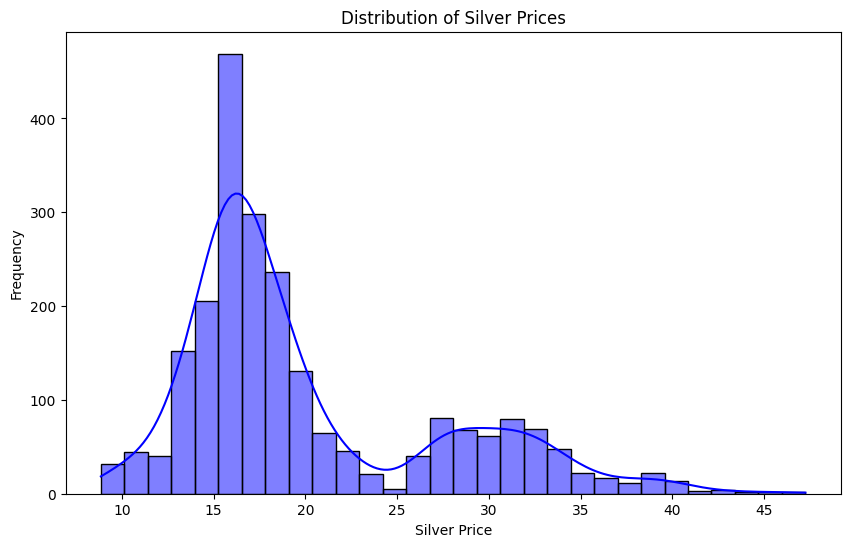

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SLV'], bins=30, kde=True, color='blue')
plt.title('Distribution of Silver Prices')
plt.xlabel('Silver Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [ ]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


<Axes: xlabel='Date', ylabel='GLD'>

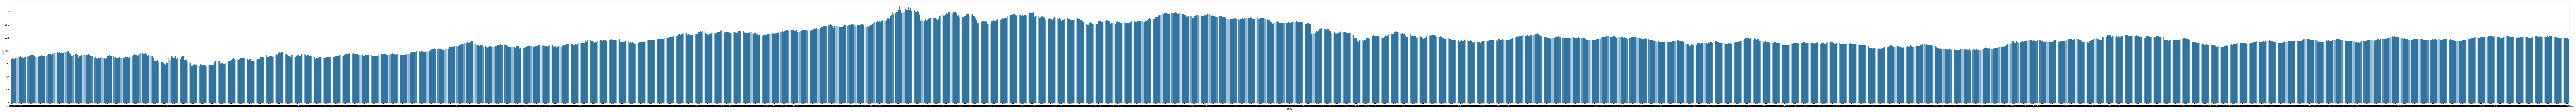

In [ ]:
plt.figure(figsize=(200,8))
sns.barplot(x='Date',y='GLD',data=df)

In [ ]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [ ]:
#Split the features and target

x = df[['SPX', 'USO', 'SLV', 'EUR/USD']].values
print(x[:3])
print(x.shape)

[[1447.160034   78.470001   15.18        1.471692]
 [1447.160034   78.370003   15.285       1.474491]
 [1411.630005   77.309998   15.167       1.475492]]
(2290, 4)


In [ ]:
y =df['GLD'].values
y

array([ 84.860001,  85.57    ,  85.129997, ..., 125.18    , 124.489998,
       122.5438  ])

In [ ]:
#2. Feature Scaling
from sklearn.preprocessing import StandardScaler

X= StandardScaler().fit_transform(x)
X[:3]

array([[-0.39914541,  2.38880956, -0.6917197 ,  1.42975293],
       [-0.39914541,  2.38368652, -0.67691224,  1.45103511],
       [-0.46760428,  2.32938091, -0.69355301,  1.45864621]])

In [ ]:
#3. split train and test data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)

(1832, 4)


In [ ]:
print(X_test.shape)

(458, 4)


In [ ]:
print(y_train.shape)

(1832,)


In [ ]:
#3.Modeling using Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

rf = RandomForestRegressor(n_estimators= 100)

#train the model
rf.fit(X_train,y_train)

#predict the trained model
rf_predict=rf.predict(X_test)




In [ ]:
y_test[:3]

array([122.32    , 129.899994, 126.980003])

In [ ]:
rf_predict[:3]

array([122.52359972, 130.34770268, 127.68159986])

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test,rf_predict)
print('Mean square error:',round(mse,2))

mae = mean_absolute_error(y_test,rf_predict)
print('Mean absolute error:',round(mae,2))

r= r2_score(y_test,rf_predict)
print('r2 score:',r)


Mean square error: 5.46
Mean absolute error: 1.25
r2 score: 0.9900458993668879


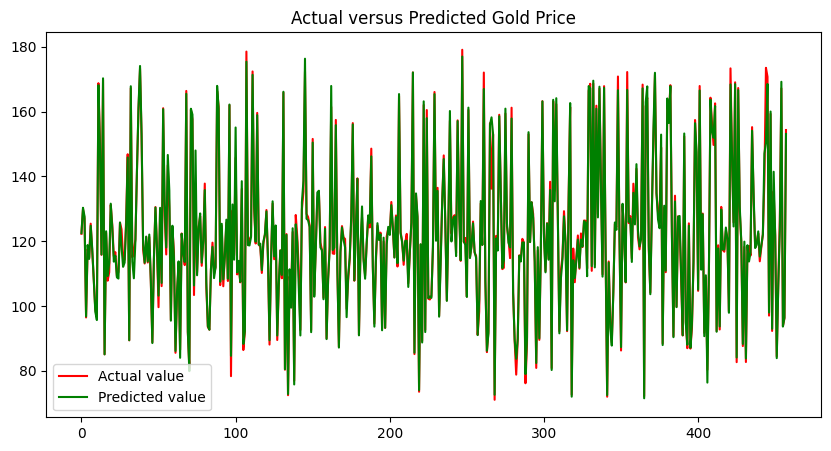

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test,color='Red',label='Actual value')
plt.plot(rf_predict,color='Green',label='Predicted value')
plt.title('Actual versus Predicted Gold Price')
plt.legend()
plt.show()

Mean Squared Error: 56.16559421500604


ValueError: x and y must be the same size

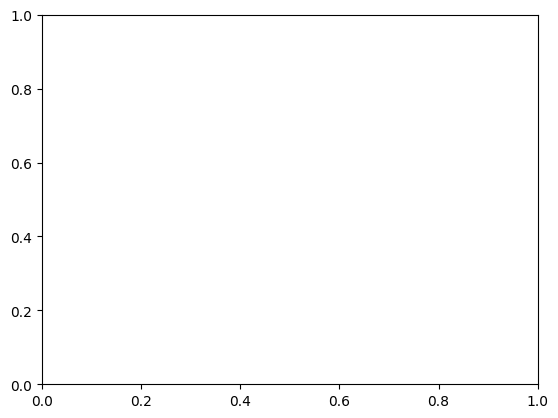

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize predictions
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Prediction')
plt.show()